### PCA
 
+ PCA reduces dimension
    + If there are 100 column in dataset then it is reduced to the 60 column (making sure that we capture the most variance)
    + The 60 reduced components are principal components
    + Data Covariance matrix
    + Eigen values(sorts in descending order) and Eigen vectors(60)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

In [32]:
# load dataset
wine_dataset = load_wine()
df = pd.DataFrame(wine_dataset.data, columns=wine_dataset.feature_names)
df.head(5)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [33]:
#standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

#Applying the PCA
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)

print('Explained variability per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variability per principal component: [0.36198848 0.1920749 ]


In [34]:
# Creating a DataFrame with principal components
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Target'] = wine_dataset.target
pca_df

,PCA1,PCA2,Target
0,3.316751,1.443463,0
1,2.209465,-0.333393,0
2,2.516740,1.031151,0
3,3.757066,2.756372,0
4,1.008908,0.869831,0
...,...,...,...
173,-3.370524,2.216289,2
174,-2.601956,1.757229,2
175,-2.677839,2.760899,2
176,-2.387017,2.297347,2


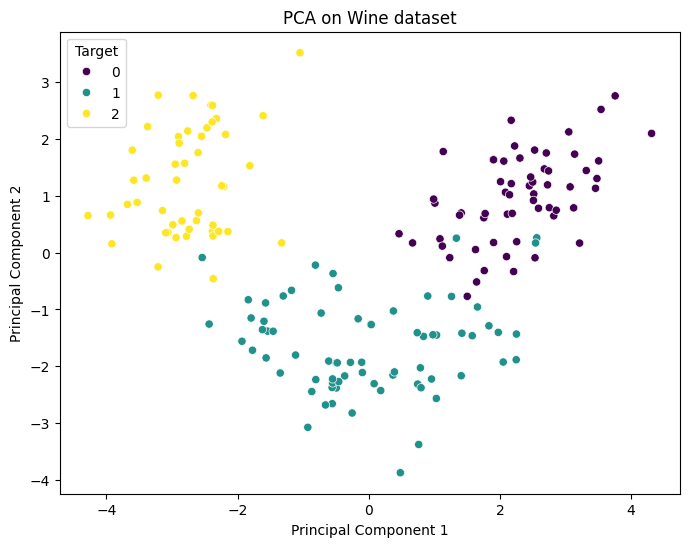

In [35]:
# visualizing the PCA result

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df['PCA1'], y=pca_df['PCA2'], hue=pca_df['Target'], palette='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Wine dataset")
plt.show()

In [ ]:
# In reduced dataset use any ML model apply classification algorithm and show classification report of all the models 
# Also train the 13 columns of the dataset and show classification report of all the models
# compare the difference